Epoch [10/100], Loss: 2.8907
Epoch [20/100], Loss: 2.6873
Epoch [30/100], Loss: 2.5024
Epoch [40/100], Loss: 2.3344
Epoch [50/100], Loss: 2.1818
Epoch [60/100], Loss: 2.0431
Epoch [70/100], Loss: 1.9171
Epoch [80/100], Loss: 1.8025
Epoch [90/100], Loss: 1.6985
Epoch [100/100], Loss: 1.6039


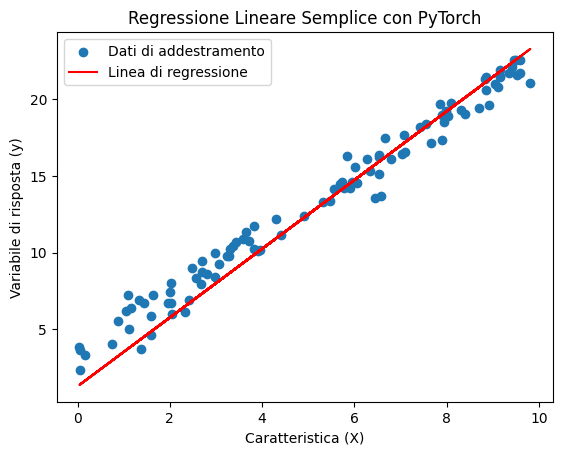

In [1]:
# Dati di esempio
torch.manual_seed(42)
X = torch.rand(100, 1) * 10
y = 2 * X + 3 + torch.randn(100, 1)

# Definizione del modello
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Inizializzazione del modello, la funzione di perdita e l'ottimizzatore
model = SimpleLinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Addestramento del modello
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass e ottimizzazione
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Stampa della perdita ogni 10 epoche
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualizzazione dei risultati
import matplotlib.pyplot as plt

with torch.no_grad():
    predicted = model(X).detach().numpy()

plt.scatter(X.numpy(), y.numpy(), label='Dati di addestramento')
plt.plot(X.numpy(), predicted, label='Linea di regressione', color='red')
plt.xlabel('Caratteristica (X)')
plt.ylabel('Variabile di risposta (y)')
plt.title('Regressione Lineare Semplice con PyTorch')
plt.legend()
plt.show()


# Importa Librerie Necessarie

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generazione di dati di esempio

In [9]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Divisione del dataset in set di addestramento e test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversione in tensori PyTorch

In [11]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Definizione del modello

In [12]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Parametri del modello

In [13]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 2

# Inizializzazione del modello, funzione di perdita e ottimizzatore

In [14]:
model = SimpleClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello

In [15]:
num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass e ottimizzazione
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Stampa della perdita ogni 10 epoche
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/50], Loss: 0.7231
Epoch [20/50], Loss: 0.6995
Epoch [30/50], Loss: 0.6762
Epoch [40/50], Loss: 0.6526
Epoch [50/50], Loss: 0.6286



# Valutazione del modello sui dati di test

In [16]:
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    predicted_labels = torch.argmax(test_predictions, dim=1)
    accuracy = accuracy_score(y_test, predicted_labels.numpy())
    print(f'Accuracy on test data: {accuracy:.4f}')

Accuracy on test data: 0.5400
